In [14]:
library(tidyverse)

In [15]:
df <- read.csv('Mental_Health_Lifestyle_Dataset.csv')
head(df)

,Country,Age,Gender,Exercise.Level,Diet.Type,Sleep.Hours,Stress.Level,Mental.Health.Condition,Work.Hours.per.Week,Screen.Time.per.Day..Hours.,Social.Interaction.Score,Happiness.Score
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Brazil,48,Male,Low,Vegetarian,6.3,Low,None,21,4.0,7.8,6.5
2,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
3,Japan,37,Female,Low,Vegetarian,7.2,High,None,43,4.7,9.6,9.7
4,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
5,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
6,Japan,23,Other,Moderate,Balanced,2.7,Moderate,Anxiety,50,3.3,8.4,7.2


## Numeric Correlations

In [16]:
myvars <- c('Happiness.Score','Sleep.Hours','Screen.Time.per.Day..Hours.',
            'Social.Interaction.Score', 'Age')
df_sub <- df[myvars]
head(df_sub)


,Happiness.Score,Sleep.Hours,Screen.Time.per.Day..Hours.,Social.Interaction.Score,Age
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,6.5,6.3,4.0,7.8,48
2,6.8,4.9,5.2,8.2,31
3,9.7,7.2,4.7,9.6,37
4,6.6,7.2,2.2,8.2,35
5,4.4,7.3,3.6,4.7,46
6,7.2,2.7,3.3,8.4,23


In [17]:
print("cor")
corr_matrix <- cor(df_sub, method = "pearson")
round(corr_matrix, 5)

[1] "cor"


,Happiness.Score,Sleep.Hours,Screen.Time.per.Day..Hours.,Social.Interaction.Score,Age
Happiness.Score,1.00000,0.01739,0.01679,-0.04024,-0.01586
Sleep.Hours,0.01739,1.00000,0.02255,-0.00522,-0.01658
Screen.Time.per.Day..Hours.,0.01679,0.02255,1.00000,0.00634,-0.00495
Social.Interaction.Score,-0.04024,-0.00522,0.00634,1.00000,-0.04387
Age,-0.01586,-0.01658,-0.00495,-0.04387,1.00000


[1] "Happiness Correlations"


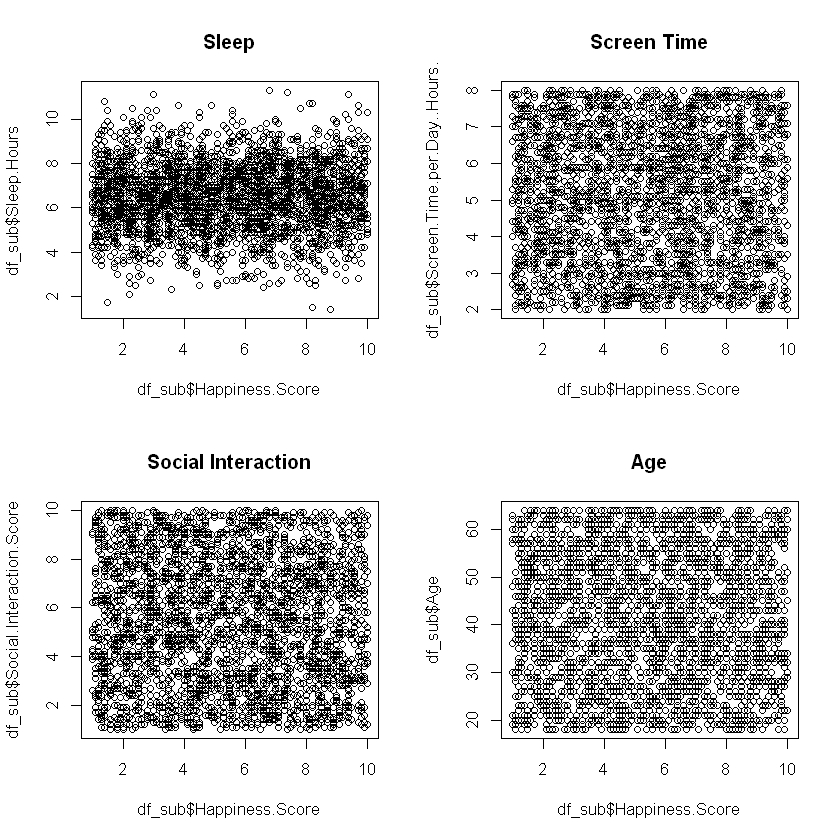

In [18]:
print("Happiness Correlations")

par(mfrow = c(2, 2))

plot(x=df_sub$Happiness.Score, y=df_sub$Sleep.Hours, main="Sleep")

plot(x=df_sub$Happiness.Score, y=df_sub$Screen.Time.per.Day..Hours., main="Screen Time")

plot(x=df_sub$Happiness.Score, y=df_sub$Social.Interaction.Score, main="Social Interaction")

plot(x=df_sub$Happiness.Score, y=df_sub$Age, main="Age")


The highest correlation is between Happiness and Social Interaction with -0.0402, which is very close to zero (AKA no correlation).

There is **no significant correlation between variables**

In [19]:
model1 <- lm(df$Happiness.Score ~ df$Sleep.Hours + df$Screen.Time.per.Day..Hours + df$Social.Interaction.Score + df$Age)
summary(model1)


Call:
lm(formula = df$Happiness.Score ~ df$Sleep.Hours + df$Screen.Time.per.Day..Hours + 
    df$Social.Interaction.Score + df$Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5728 -2.2015  0.0106  2.1376  4.7669 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.448820   0.305092  17.860   <2e-16 ***
df$Sleep.Hours                 0.028159   0.031133   0.904   0.3658    
df$Screen.Time.per.Day..Hours  0.024288   0.026722   0.909   0.3635    
df$Social.Interaction.Score   -0.040919   0.018226  -2.245   0.0248 *  
df$Age                        -0.003296   0.003480  -0.947   0.3436    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.556 on 2995 degrees of freedom
Multiple R-squared:  0.00249,	Adjusted R-squared:  0.001158 
F-statistic: 1.869 on 4 and 2995 DF,  p-value: 0.113


## Statistical Conclusion:
There is no strong correlation between any of the variables and the model does not have enough evidence if there was significance.

# Happiness Levels of Sub Populations

In [56]:
df_stress <- df[c("Stress.Level", "Happiness.Score")]
df_country <- df[c("Country", "Happiness.Score")]
df_gender<- df[c("Gender", "Happiness.Score")]
df_exercise <- df[c("Exercise.Level", "Happiness.Score")]
df_diet <- df[c("Diet.Type", "Happiness.Score")]


In [61]:
stress_means <- aggregate(Happiness.Score ~ Stress.Level, df_stress, mean)
country_means <- aggregate(Happiness.Score ~ Country, df_country, mean)
gender_means <- aggregate(Happiness.Score ~ Gender, df_gender, mean)
exercise_means <- aggregate(Happiness.Score ~ Exercise.Level, df_exercise, mean)
diet_means <- aggregate(Happiness.Score ~ Diet.Type, df_diet, mean)

print(diet_means)


   Diet.Type Happiness.Score
1   Balanced        5.247680
2  Junk Food        5.436264
3       Keto        5.339616
4      Vegan        5.287086
5 Vegetarian        5.664527


[1] "Happiness vs. Demographics Graph"


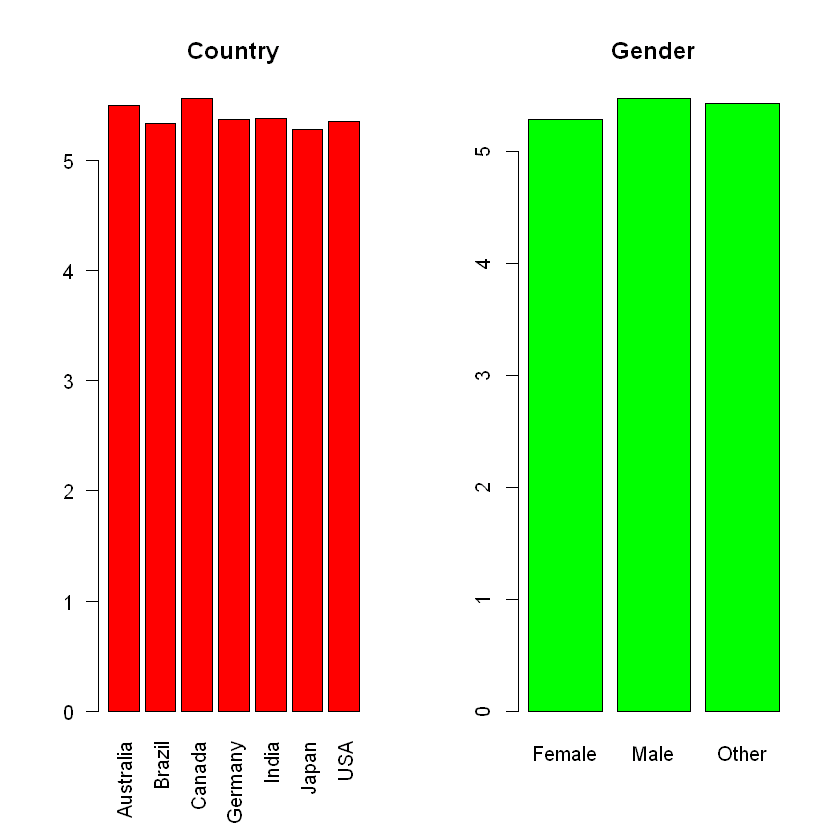

In [67]:
par(mfrow = c(1, 2))

print("Happiness vs. Demographics Graph")

barplot(country_means$Happiness.Score, main="Country", names.arg=country_means$Country, col="red", las=2)
barplot(gender_means$Happiness.Score, main="Gender", names.arg=gender_means$Gender, col="green")

[1] "Happiness vs. Lifestyle Graph"


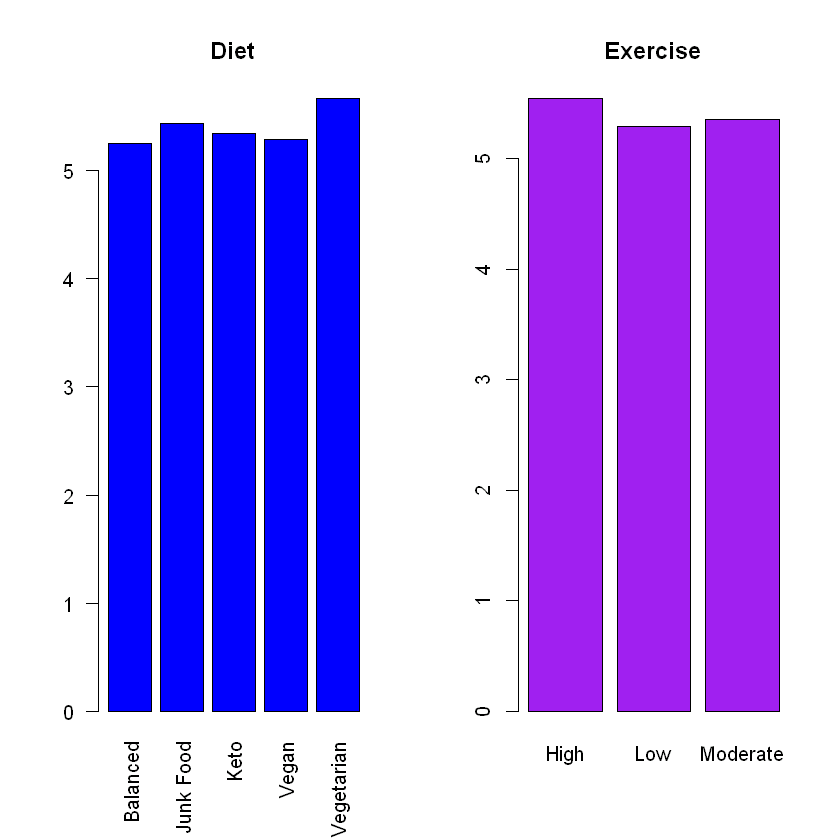

In [66]:
par(mfrow = c(1, 2))

print("Happiness vs. Lifestyle Graph")

barplot(diet_means$Happiness.Score, main="Diet", names.arg=diet_means$Diet.Type, col="blue", las=2)
barplot(exercise_means$Happiness.Score, main="Exercise", names.arg=exercise_means$Exercise.Level, col="purple")

[1] "Happiness vs. Stress Graph"


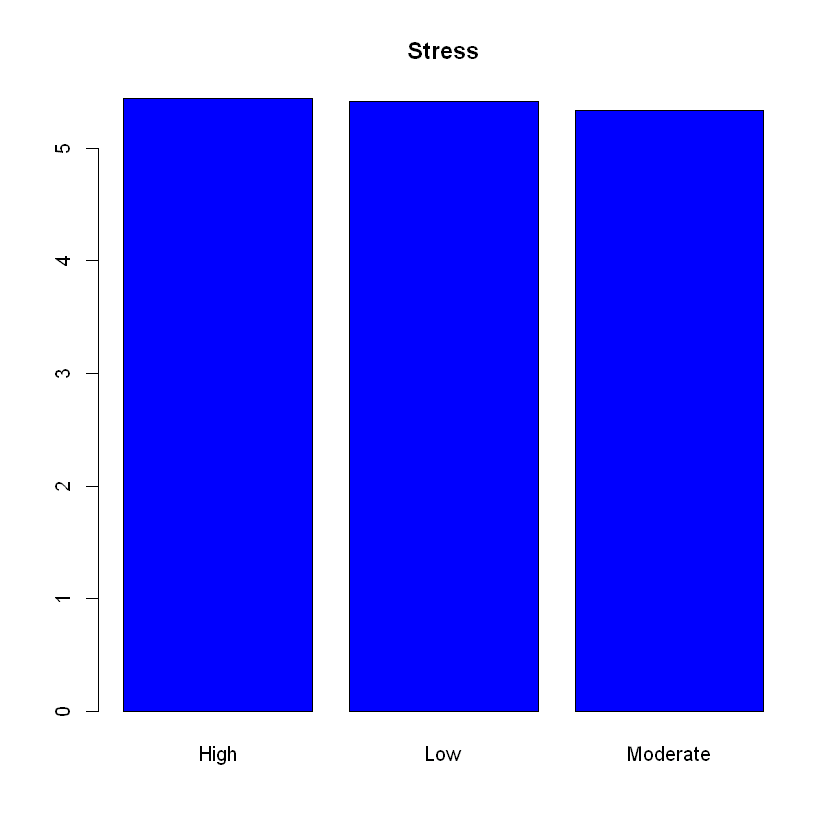

In [65]:
print("Happiness vs. Stress Graph")
barplot(stress_means$Happiness.Score, main="Stress", names.arg=stress_means$Stress.Level, col="blue")
